# Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

trip = pd.read_csv("../data/clean/trip.csv")

# Drop any columns with the string "id" or "flag" in them
for col in trip:
  if "id" in col:
    trip = trip.drop(col, axis=1)

# Drop these columns: 'reason_for_travel_to', 'why_trip', 'trip_purpose_old_schema'
trip = trip.drop(['trip_purpose_old_schema', 'why_trip', 'reason_for_travel_to'], axis=1)

# Prepare trip data for model
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

for col in trip.columns.drop('trip_purpose'):
  if trip[col].dtype == object:
    trip[col] = label_encoder.fit_transform(trip[col])

# Normalize all columns
for col in trip.columns.drop('trip_purpose'):
    trip[col] = scaler.fit_transform(trip[col].values.reshape(-1, 1))

# Remove rows where trip purpose is "Not Ascertained"
trip = trip[trip["trip_purpose"] != "Not ascertained"]
trip = trip.reset_index(drop=True)

vis = trip["trip_purpose"].astype('category')

trip["trip_purpose"] = label_encoder.fit_transform(trip["trip_purpose"])
target = trip["trip_purpose"].to_numpy()
features = trip.drop('trip_purpose', axis=1).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [2]:
# Hyper parameter tuning for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
# k fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1989)

Cs = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
results = []
# Create the logistic regression model
log_reg = LogisticRegression(n_jobs=-1, max_iter=1000)
for c in Cs:
  log_reg.set_params(C=c)
  scores = []
  print(f"Running for C: {c}")
  for train_index, test_index in kf.split(x_train):
    x_train_kf, x_val = x_train[train_index], x_train[test_index]
    y_train_kf, y_val = y_train[train_index], y_train[test_index]
    log_reg.fit(x_train_kf, y_train_kf)
    scores.append(log_reg.score(x_val, y_val))
  print(f"C: {c}, Accuracy: {np.mean(scores)}")
  results.append({"C": c, "Accuracy": np.mean(scores)})

Running for C: 0.0001


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.war

C: 0.0001, Accuracy: 0.28856682769726244
Running for C: 0.001


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C: 0.001, Accuracy: 0.39762479871175527
Running for C: 0.005


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.war

C: 0.005, Accuracy: 0.41968599033816434
Running for C: 0.01
C: 0.01, Accuracy: 0.4294283413848631
Running for C: 0.05


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C: 0.05, Accuracy: 0.44613526570048306
Running for C: 0.1


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C: 0.1, Accuracy: 0.44959742351046705
Running for C: 0.5


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 0.5, Accuracy: 0.4571658615136876


In [4]:
results = pd.DataFrame(results)

In [5]:
results.sort_values(by="Accuracy", ascending=False).head()

best_c = results.sort_values(by="Accuracy", ascending=False).head(1)["C"].values[0]

Train accuracy: 0.4584
Test accuracy: 0.4546


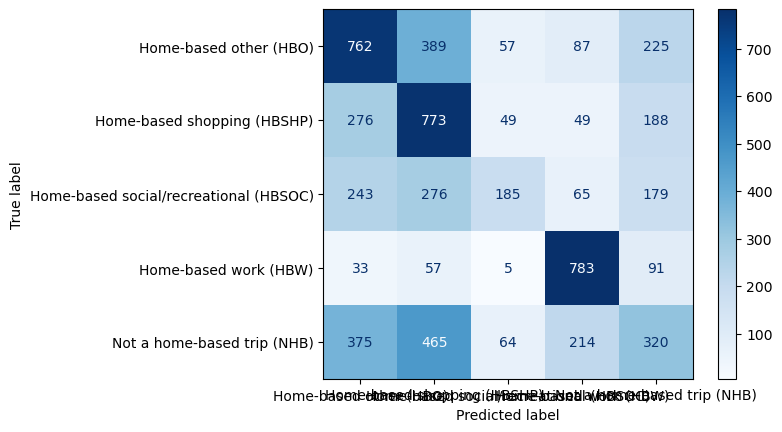

In [6]:
# Train the model with the best C
log_reg.set_params(C=best_c)
log_reg.fit(x_train, y_train)

print(f"Train accuracy: {log_reg.score(x_train, y_train):.4f}")
print(f"Test accuracy: {log_reg.score(x_test, y_test):.4f}")

y_pred = log_reg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vis.cat.categories)
disp.plot(cmap="Blues")
plt.show()

# Support Vector Machine

In [7]:
# Hyper parameter tuning for svm
from sklearn.svm import SVC
# Create the SVM model

Cs = [0.001, 0.01, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

results_svm = []
for c in Cs:
  for k in kernel:
    svc = SVC(C=c, kernel=k)
    scores = []
    print(f"Running for C: {c}, kernel: {k}")
    for train_index, test_index in kf.split(x_train):
      print(f"In fold {len(scores) + 1}/5")
      x_train_kf, x_val = x_train[train_index], x_train[test_index]
      y_train_kf, y_val = y_train[train_index], y_train[test_index]
      svc.fit(x_train_kf, y_train_kf)
      scores.append(svc.score(x_val, y_val))
    print(f"C: {c}, kernel: {k}, Accuracy: {np.mean(scores)}")
    results_svm.append({"C": c, "Kernel": k, "Accuracy": np.mean(scores)})

Running for C: 0.001, kernel: linear
In fold 1/5
In fold 2/5
In fold 3/5
In fold 4/5
In fold 5/5
C: 0.001, kernel: linear, Accuracy: 0.3902576489533011
Running for C: 0.001, kernel: poly
In fold 1/5
In fold 2/5
In fold 3/5
In fold 4/5
In fold 5/5
C: 0.001, kernel: poly, Accuracy: 0.3787842190016103
Running for C: 0.001, kernel: rbf
In fold 1/5
In fold 2/5
In fold 3/5
In fold 4/5
In fold 5/5
C: 0.001, kernel: rbf, Accuracy: 0.24935587761674718
Running for C: 0.001, kernel: sigmoid
In fold 1/5
In fold 2/5
In fold 3/5
In fold 4/5
In fold 5/5
C: 0.001, kernel: sigmoid, Accuracy: 0.24935587761674718
Running for C: 0.01, kernel: linear
In fold 1/5
In fold 2/5
In fold 3/5
In fold 4/5
In fold 5/5
C: 0.01, kernel: linear, Accuracy: 0.42439613526570047
Running for C: 0.01, kernel: poly
In fold 1/5
In fold 2/5
In fold 3/5
In fold 4/5
In fold 5/5
C: 0.01, kernel: poly, Accuracy: 0.4268921095008052
Running for C: 0.01, kernel: rbf
In fold 1/5
In fold 2/5
In fold 3/5
In fold 4/5
In fold 5/5
C: 0.01,

In [8]:
results_svm = pd.DataFrame(results_svm)
results_svm.to_csv("svm_results.csv", index=False)

results_svm.sort_values(by="Accuracy", ascending=False).head()

,C,Kernel,Accuracy
17,10.0,poly,0.537963
18,10.0,rbf,0.527134
13,1.0,poly,0.499718
14,1.0,rbf,0.474718
9,0.1,poly,0.464493


Train accuracy: 0.6913
Test accuracy: 0.5525


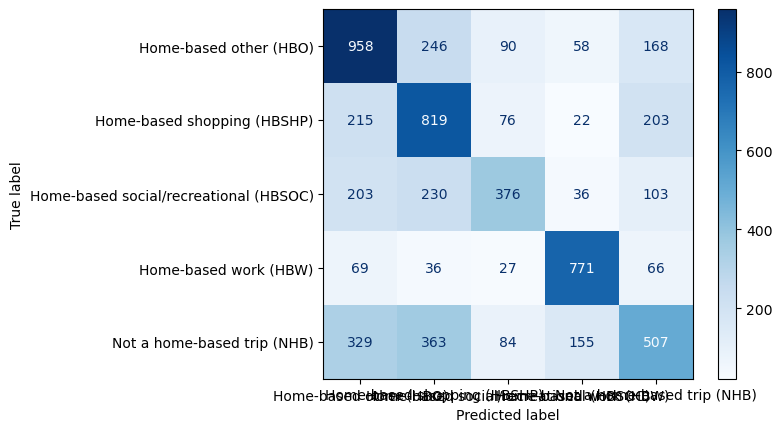

In [9]:
# Train the model with the best C and kernel
best_c = results_svm.sort_values(by="Accuracy", ascending=False).head(1)["C"].values[0]
best_kernel = results_svm.sort_values(by="Accuracy", ascending=False).head(1)["Kernel"].values[0]

svc = SVC(C=best_c, kernel=best_kernel)
svc.fit(x_train, y_train)

print(f"Train accuracy: {svc.score(x_train, y_train):.4f}")
print(f"Test accuracy: {svc.score(x_test, y_test):.4f}")

y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vis.cat.categories)
disp.plot(cmap="Blues")
plt.show()

In [6]:
import pandas as pd

trip = pd.read_csv("../data/clean/trip.csv")
person = pd.read_csv("../data/clean/person.csv")

In [9]:
# Sum up the number of trips
# detect the word trip in person.columns
trip_cols = [col for col in person.columns if "trip" in col]
print(trip_cols)

# Sum count_person_trips over person
person["count_person_trips"].sum()

['count_person_trips', 'fewer_trips_last_30', 'fewer_trips_last_30_reason_more_deliveries', 'fewer_trips_last_30_reason_covid', 'fewer_trips_last_30_reason_not_feel_safe', 'fewer_trips_last_30_reason_not_feel_clean', 'fewer_trips_last_30_reason_not_reliable', 'fewer_trips_last_30_reason_not_go_where_needed', 'fewer_trips_last_30_reason_unaffordable', 'fewer_trips_last_30_reason_health', 'fewer_trips_last_30_reason_time', 'fewer_trips_last_30_reason_other']


31074